## Homework 2

In [46]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# note: 
# df = pd.read_csv('https://...csv') - note the ' '' '
# !wget https://...csv - Extra step: pd.read_csv('file.csv')
# curl -o file.ipynb https://...ipynb

In [48]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [49]:
df = pd.read_csv(url)
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


## Instructions: 

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [50]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


# Instructions:
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

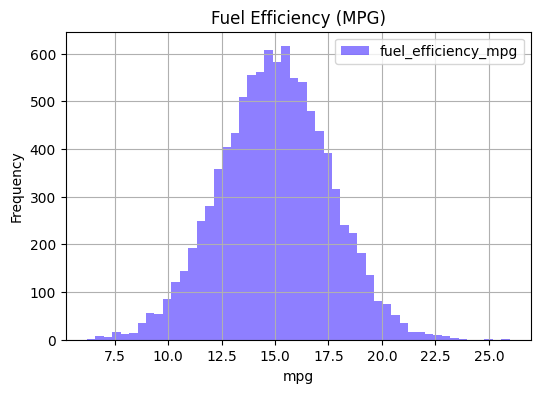

In [51]:
plt.figure(figsize=(6,4))

df['fuel_efficiency_mpg'].hist(bins=50, alpha=0.5, label='fuel_efficiency_mpg', color="#1E00FF")

plt.legend()

plt.title('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.xlabel('mpg')    

plt.show()

Answer: fuel_efficiency mpg variable does NOT have a long-tail. (And thus, does not need 'np.log1p')

# Q1: There's one column with missing values. What is it?

In [52]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Answer: horsepower, with 708 missing values

# Q2: What's the median (50% percentile) for variable 'horsepower'?

In [53]:
df['horsepower'].median().item()

149.0

Answer: 149.0

# Instructions:
Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [54]:
df.dtypes
# strings = list(df[df.dtypes == 'object'].index)
# for c in strings:
#    df[c] = df[c].str.lower().str.replace(' ', '_')
# string replacements not needed as there are no 'object' values

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [55]:
n = len(df)
idx = np.arange(len(df)) # arange - creates array of df length (array range), assign to idx
np.random.seed(42)
np.random.shuffle(idx)

In [56]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [57]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].reset_index(drop=True).copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].reset_index(drop=True).copy()
df_test = df_shuffled.iloc[n_train+n_val:].reset_index(drop=True).copy()

In [58]:
# hw model code - does not use 'np.log1p' 
# perhaps value range is not too big
# let's check

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [59]:
target = df['fuel_efficiency_mpg']

# values in col makes sense - mpg should small
# does not go beyond hundredth place
# In car-price, use np.log1p(msrp) - prices heavily right-skewed 
# (most < $40k, few > $200k). 
# In fuel efficiency, mpg values roughly symmetric (20–40)
#  log not needed - could even hurt.

print("Min:", target.min())
print("Max:", target.max())
print("Mean:", target.mean())
print("Median:", target.median())
print("Skewness:", target.skew())
target.describe()

# |skewness| > 1 → strong skew use np.log1p()
# 0.5 < |skewness| < 1 → moderate maybe log
# |skewness| < 0.5 → no log needed

Min: 6.200970533392815
Max: 25.96722204888372
Mean: 14.985243228208573
Median: 15.006036963481211
Skewness: -0.012062219273507922


count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

In [60]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [61]:
def train_linear_regression(X, y): # define regression function
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   XTX = X.T.dot(X)
   XTX_inv = np.linalg.inv(XTX)
   w = XTX_inv.dot(X.T).dot(y)

   return w[0], w[1:]


def rmse (y, y_pred): # define rmse function
   se = (y - y_pred)**2
   mse = se.mean()
   return np.sqrt(mse)

In [62]:
# Replace with '0'
X_train_0 = df_train.fillna(0).values
X_val_0 = df_val.fillna(0).values

w0, w = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0 + X_val_0.dot(w)
print(rmse(y_val, y_pred_0).round(2))

0.52


In [63]:
# With 'mean'
mean_hp = df_train['horsepower'].mean()
X_train_mean = df_train.fillna(mean_hp).values
X_val_mean = df_val.fillna(mean_hp).values

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
print(rmse(y_val, y_pred_mean).round(2))

0.46


### Answer:
Mean is better - smaller error.

Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If multiple options give the same best RMSE, select the smallest r.

In [ ]:

def train_linear_regression_reg(X, y, r=0.0): # define regression function with 'r' placeholder
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   XTX = X.T.dot(X)
   reg = r * np.eye(XTX.shape[0])
   XTX = XTX + reg  # add 'reg' ('(r * size of XTX)') to create colums with r with length of XTX
   
   
   XTX_inv = np.linalg.inv(XTX)
   w = XTX_inv.dot(X.T).dot(y)

   return w[0], w[1:]

# special output code - choose lowest (best) rounded rmse score, output that 'r' value
# if all 'r' values are identicle - choose lowest 'r'

best_rmse = np.inf # 'np.inf' assigns the BIGGEST possible value, assign to variable 'best_rmse'

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
   w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
   y_pred = w0 + X_val.dot(w)
   print('the value of r is:', r,'  ', 'the score of rmse is:', rmse(y_val, y_pred).round(2))

the value of r is: 0    the score of rmse is: 0.52
the value of r is: 0.01    the score of rmse is: 0.52
the value of r is: 0.1    the score of rmse is: 0.52
the value of r is: 1    the score of rmse is: 0.52
the value of r is: 5    the score of rmse is: 0.52
the value of r is: 10    the score of rmse is: 0.52
the value of r is: 100    the score of rmse is: 0.52


NOTES 

